In [12]:
import pandas as pd
import os

In [13]:
df = pd.read_excel(io = 'data/export_heatmap_x_uk_x_filter_nativeretweets_geocode_55_378051_3_43597299999999_750km_2016_04_21_12_01_35.xlsx',
                   sheet_name = 'Geolocalization')
df = pd.DataFrame({'longitude': df['Longitude'], 'latitude': df['Latitude'],
                    'repetitions': df['Keyword Repetitions'], 'place': df['Place (as appears on Bio)']})

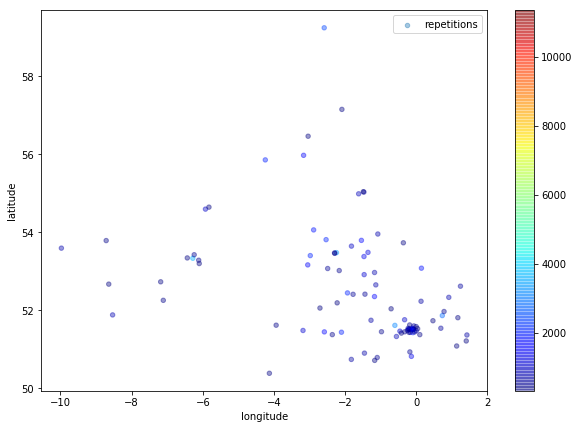

In [14]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="longitude", y="latitude",
         c=df['repetitions'], label='repetitions',
         cmap=plt.get_cmap("jet"), colorbar=True, alpha=0.4,
         figsize=(10,7) )
plt.show()

In [15]:
import ee
import folium

print(folium.__version__)

0.8.3


In [16]:
import folium.plugins as plugins

In [17]:
hm = plugins.HeatMapWithTime(df, auto_play=True, max_opacity=0.5)

In [18]:
#call this again to start clean
taxi_map=folium.Map(location=[52.218258, -3.541508], #lat, longitude
                   tiles='stamentoner', #Mapbox Bright is an alternative, but zoom doesn't work
                   zoom_start=12, max_zoom=20)

In [19]:
hm.add_to(taxi_map)

In [20]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [21]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
heatmap = HeatMap(data=df[['latitude', 'longitude', 'repetitions']].values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [22]:
heatmap